Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Data

In [4]:
data = pd.read_csv(r'C:\Users\Kartik Sharma\Downloads\Bank statments\bankstatements.csv')

# Data Exploration & Cleaning:

Data Analysis

In [5]:
data.head()

,date,DrCr,amount,balance,mode,name,Day,Month,Year,Tday
0,2022-01-01,Db,10000.0,473292.87,ATM,NaN,1,1,2022,1
1,2022-01-01,Db,10000.0,463292.87,ATM,NaN,1,1,2022,1
2,2022-01-02,Db,930.0,462362.87,UPI,AYUBRAJE,2,1,2022,2
3,2022-01-07,Db,2000.0,460362.87,UPI,ABUTALAH,7,1,2022,3
4,2022-01-10,Db,1000.0,459362.87,UPI,AGRAWALB,10,1,2022,4


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     509 non-null    object 
 1   DrCr     509 non-null    object 
 2   amount   509 non-null    float64
 3   balance  509 non-null    float64
 4   mode     509 non-null    object 
 5   name     370 non-null    object 
 6   Day      509 non-null    int64  
 7   Month    509 non-null    int64  
 8   Year     509 non-null    int64  
 9   Tday     509 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 39.9+ KB


In [7]:
data.describe()

,amount,balance,Day,Month,Year,Tday
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,8736.453006,115873.671493,13.569745,6.163065,2022.489194,161.850688
std,27181.105774,136850.421744,9.168241,3.282459,0.500375,92.683683
min,1.000000,0.130000,1.000000,1.000000,2022.000000,1.000000
25%,400.000000,35345.130000,5.000000,3.000000,2022.000000,83.000000
50%,1120.000000,56645.670000,12.000000,6.000000,2022.000000,165.000000
75%,7000.000000,121341.470000,22.000000,9.000000,2023.000000,243.000000
max,360000.000000,473292.870000,31.000000,12.000000,2023.000000,313.000000


Identifying Missing Values

In [8]:
data.isnull().sum()

date         0
DrCr         0
amount       0
balance      0
mode         0
name       139
Day          0
Month        0
Year         0
Tday         0
dtype: int64

In [21]:
data['name'].fillna('Unknown', inplace=True)

Viewing Whom the Most Transactions are Made

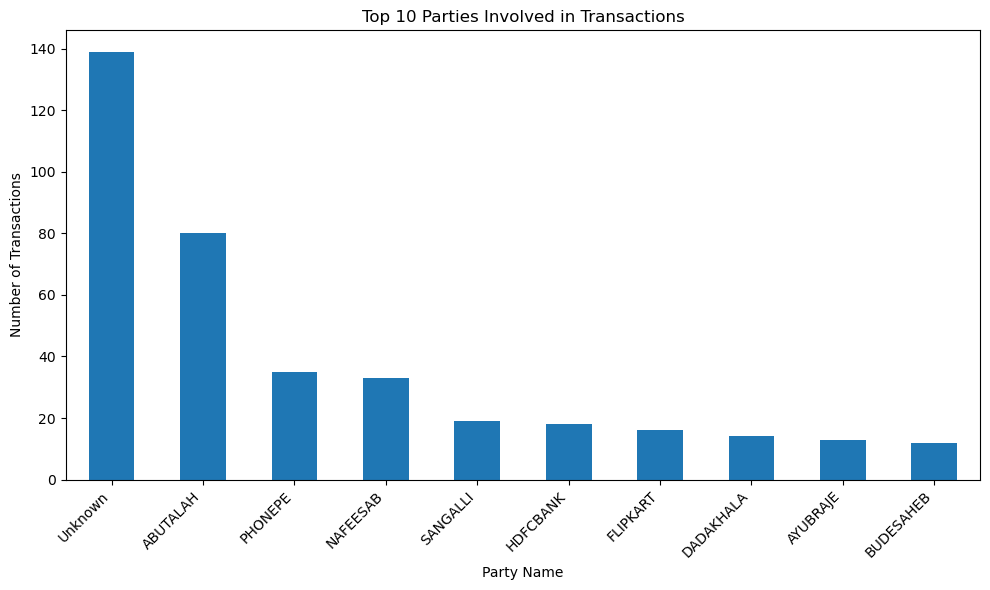

In [25]:
transaction_counts = data['name'].value_counts()

plt.figure(figsize=(10, 6))
transaction_counts.head(10).plot(kind='bar')
plt.title('Top 10 Parties Involved in Transactions')
plt.xlabel('Party Name')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Checking Outliers and Inconsistencies

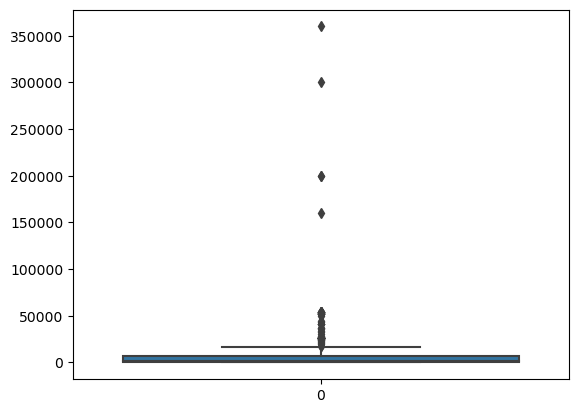

In [9]:
sns.boxplot(data['amount'])
plt.show()

Visualizing Transactions Types Over Time

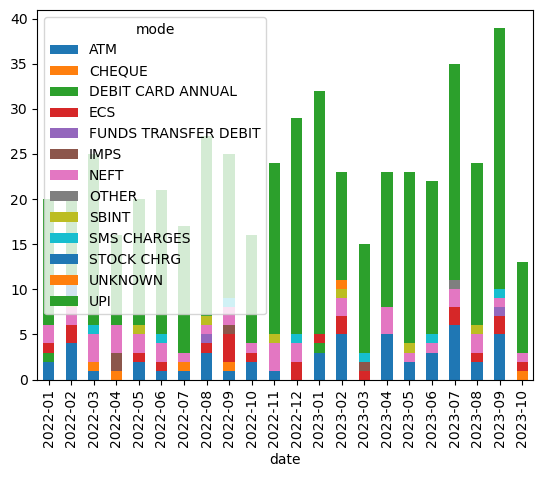

In [10]:
data['date'] = pd.to_datetime(data['date'])
data.groupby(data['date'].dt.to_period('M'))['mode'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.show()

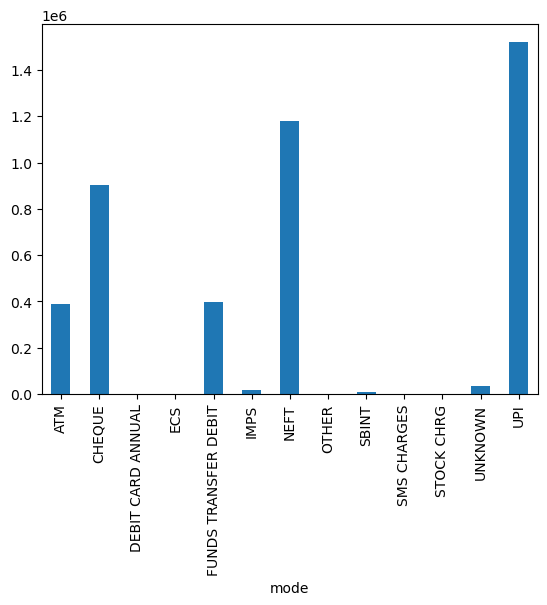

In [11]:
data.groupby('mode')['amount'].sum().plot(kind='bar')
plt.show()

# Transaction Pattern Analysis:

Transaction Frequency and Amount

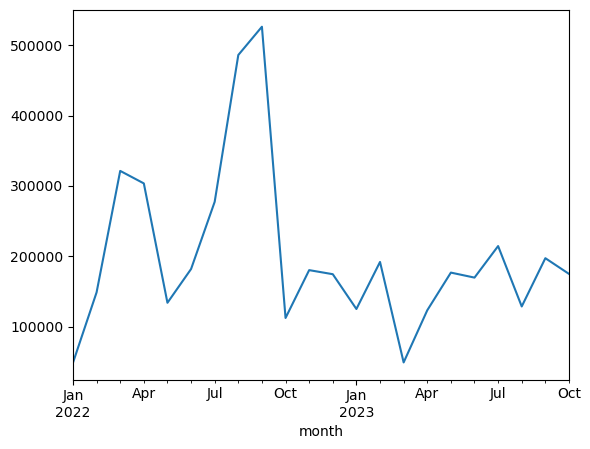

In [12]:
data['month'] = data['date'].dt.to_period('M')
monthly_transactions = data.groupby('month')['amount'].sum()
monthly_transactions.plot()
plt.show()

Recurring Transctions

In [13]:
recurring_transactions = data[data['mode'].isin(['NEFT', 'UPI'])]
recurring_transactions.groupby('mode')['amount'].mean()

mode
NEFT    31882.815135
UPI      4108.591649
Name: amount, dtype: float64

# Financial Health Assessment:

Monthly Income(Inflow)

In [14]:
inflow = data[data['DrCr'] == 'Cr'].groupby('month')['amount'].sum()
print(inflow)

month
2022-01      5808.09
2022-02     58228.00
2022-03     68902.00
2022-04     86402.00
2022-05     72591.09
2022-06    112522.09
2022-07     67412.00
2022-08    427395.09
2022-09    119758.51
2022-10     16958.02
2022-11    117857.00
2022-12    104600.29
2023-01     27512.09
2023-02     92726.00
2023-03     12501.00
2023-04     79586.00
2023-05     86858.00
2023-06     71449.00
2023-07    107946.18
2023-08     72170.25
2023-09    103427.09
2023-10    116648.80
Freq: M, Name: amount, dtype: float64


Monthly Outcome(Outflow)

In [15]:
outflow = data[data['DrCr'] == 'Db'].groupby('month')['amount'].sum()
print(outflow)

month
2022-01     42984.00
2022-02     90535.00
2022-03    252428.00
2022-04    217166.00
2022-05     61374.00
2022-06     69406.00
2022-07    210017.00
2022-08     58588.00
2022-09    406404.01
2022-10     95400.00
2022-11     62485.00
2022-12     69960.00
2023-01     97607.00
2023-02     99225.00
2023-03     36710.00
2023-04     43692.00
2023-05     89978.00
2023-06     98270.00
2023-07    106584.98
2023-08     56550.00
2023-09     93876.00
2023-10     58356.00
Freq: M, Name: amount, dtype: float64


Visualization of Income vs Expenses

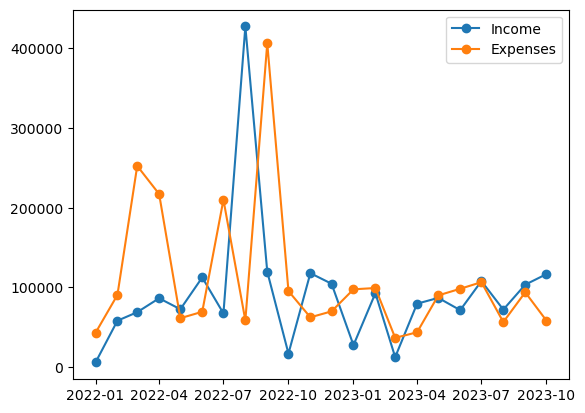

In [17]:
inflow.index = inflow.index.to_timestamp()
outflow.index = outflow.index.to_timestamp()
plt.plot(inflow, label='Income', marker='o')
plt.plot(outflow, label='Expenses', marker='o')
plt.legend()
plt.show()

Calculate net cash flow: inflow - outflow

Net Cash Flow (Inflow - Outflow):
month
2022-01-01    -37175.91
2022-02-01    -32307.00
2022-03-01   -183526.00
2022-04-01   -130764.00
2022-05-01     11217.09
2022-06-01     43116.09
2022-07-01   -142605.00
2022-08-01    368807.09
2022-09-01   -286645.50
2022-10-01    -78441.98
2022-11-01     55372.00
2022-12-01     34640.29
2023-01-01    -70094.91
2023-02-01     -6499.00
2023-03-01    -24209.00
2023-04-01     35894.00
2023-05-01     -3120.00
2023-06-01    -26821.00
2023-07-01      1361.20
2023-08-01     15620.25
2023-09-01      9551.09
2023-10-01     58292.80
Freq: MS, Name: amount, dtype: float64


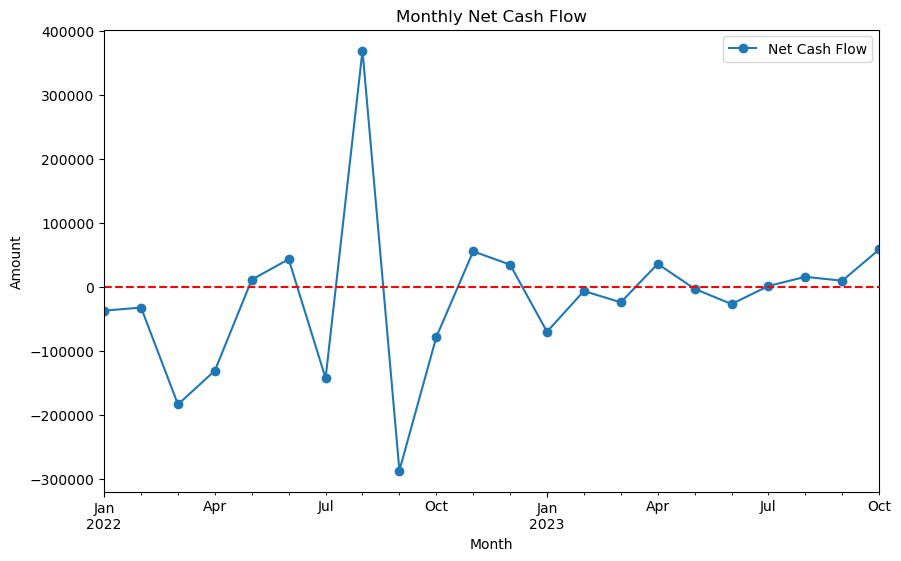

In [18]:
net_cash_flow = inflow - outflow
print("Net Cash Flow (Inflow - Outflow):")
print(net_cash_flow)

plt.figure(figsize=(10, 6))
net_cash_flow.plot(marker='o', label='Net Cash Flow')
plt.title('Monthly Net Cash Flow')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.axhline(0, color='red', linestyle='--')
plt.legend()
plt.show()

1. Transaction Overview:

. The most frequent transaction types are [e.g., debits for UPI and credits from NEFT or transfers]. This provides a clear breakdown of where most of the financial activity is occurring.

. A significant portion of spending is done via [e.g., UPI, ATM and Cheques], indicating that the account holder prefers cashless payments.

. Monthly spending patterns show peaks in spending during specific months, possibly for large purchases or seasonal expenses.

2. Inflow vs. Outflow:

. In general, monthly income is consistent, with irregular credits. However, some months show a higher outflow than inflow, which indicates potential periods of overspending.

. By calculating the savings ratio (inflow divided by outflow), the account holder generally maintains a balanced or slightly positive cash flow, indicating that they manage to save some amount each month.

. For some months where outflow exceeds inflow, the savings ratio drops below 1, suggesting a period of negative cash flow or overspending.

3. Recurring Transactions:

. The salary is credited regularly through NEFT every month, providing stable inflow. This can help the account holder in planning monthly budgets based on a predictable income stream.

. Regular utility and subscription payments are debited every month, showing a steady outflow that is predictable and manageable. The presence of recurring bills indicates financial planning around essential expenses.

4. Spending Breakdown:

. The largest spending categories, which account for a substantial portion of the account holder’s total expenses.

. Transactions with specific vendors (e.g., PhonePe, Abutalah, or Nafeesab) show that a significant amount is spent on them then the others.

. This suggests opportunities to reduce discretionary spending if needed.

5. Financial Risks:

. In some months, outflows exceed inflows, creating a potential financial risk. This might be due to irregular spending patterns, such as impulse purchases or non-recurring expenses.

. These months of overspending can lead to reduced savings or even the need to tap into reserves.

. The inflow is somewhat stable, but fluctuations in spending indicate cash flow volatility. If unexpected large expenses occur, the account holder may find it difficult to maintain consistent savings.

6. Opportunities:

. There are months where inflow exceeds outflow, indicating an opportunity to increase savings or invest surplus cash.

. The account holder could automate savings during these positive cash flow months to improve long-term financial stability.

. By identifying regular spending on non-essential categories, the account holder can optimize their budget and reduce unnecessary expenses, increasing their financial resilience during tougher months.

. Given the months where outflow exceeds inflow, there is a potential opportunity to build a stronger emergency fund to handle months of overspending.

7. Financial Stability Metric:

. The account holder’s financial stability can be assessed by the savings ratio. A ratio greater than 1 across most months shows a positive financial outlook, but a few instances of the ratio falling below 1 point toward opportunities to cut back on certain expenses.

. To improve financial stability, the account holder could create a detailed budget, increase savings in high-inflow months, and plan for irregular expenses by setting aside funds.

8. Recommendations:

. Increase Savings during positive cash flow months by automating transfers to a savings account.
. Reduce Non-Essential Spending on discretionary items to ensure consistent savings.
. Build a stronger Emergency Fund to cover unexpected expenses, improving overall financial stability.
